In [48]:
import pandas as pd
from config import api_key

# Loads business characteristics by state
state_char = pd.read_json(f'https://api.census.gov/data/2018/abscb?get=NAME,BUSCHAR,EMPSZFI,EMPSZFI_LABEL,FIRMPDEMP&for=us:*&NAICS2017=00&QDESC=B02&key={api_key}')
state_char.columns = state_char.iloc[0]
state_char = state_char.iloc[1:].reset_index(drop=True)
state_char.head()

,NAME,BUSCHAR,EMPSZFI,EMPSZFI_LABEL,FIRMPDEMP,NAICS2017,QDESC,us
0,United States,A1,001,All firms,5722142,00,B02,1
1,United States,BM,001,All firms,787775,00,B02,1
2,United States,BN,001,All firms,1893857,00,B02,1
3,United States,BO,001,All firms,2681631,00,B02,1
4,United States,BP,001,All firms,126346,00,B02,1


In [49]:
state_char['FIRMPDEMP'] = state_char['FIRMPDEMP'].astype(int)
state_char.FIRMPDEMP.describe().astype(object)

count             60.0
mean     376244.033333
std      915096.769979
min               22.0
25%            7233.25
50%            34490.0
75%           244818.0
max          5722142.0
Name: FIRMPDEMP, dtype: object

In [50]:
state_char = state_char[['BUSCHAR', 'EMPSZFI_LABEL', 'FIRMPDEMP']]
state_char.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   BUSCHAR        60 non-null     object
 1   EMPSZFI_LABEL  60 non-null     object
 2   FIRMPDEMP      60 non-null     int32 
dtypes: int32(1), object(2)
memory usage: 1.3+ KB


In [51]:
char_query = state_char.query('(BUSCHAR == "BN" or BUSCHAR == "BM") and EMPSZFI_LABEL != "All firms"')
char_query.head(18)

,BUSCHAR,EMPSZFI_LABEL,FIRMPDEMP
7,BM,Firms with no employees,58025
8,BN,Firms with no employees,164836
13,BM,Firms with 1 to 4 employees,370201
14,BN,Firms with 1 to 4 employees,1038613
19,BM,Firms with 5 to 9 employees,158710
20,BN,Firms with 5 to 9 employees,338052
25,BM,Firms with 10 to 19 employees,108505
26,BN,Firms with 10 to 19 employees,202187
31,BM,Firms with 20 to 49 employees,68627
32,BN,Firms with 20 to 49 employees,112244


In [52]:
import numpy as np
import matplotlib.pyplot as plt
   
family_query = char_query.query('BUSCHAR == "BM"')
nonfamily_query = char_query.query('BUSCHAR == "BN"')

type(family_query)

pandas.core.frame.DataFrame

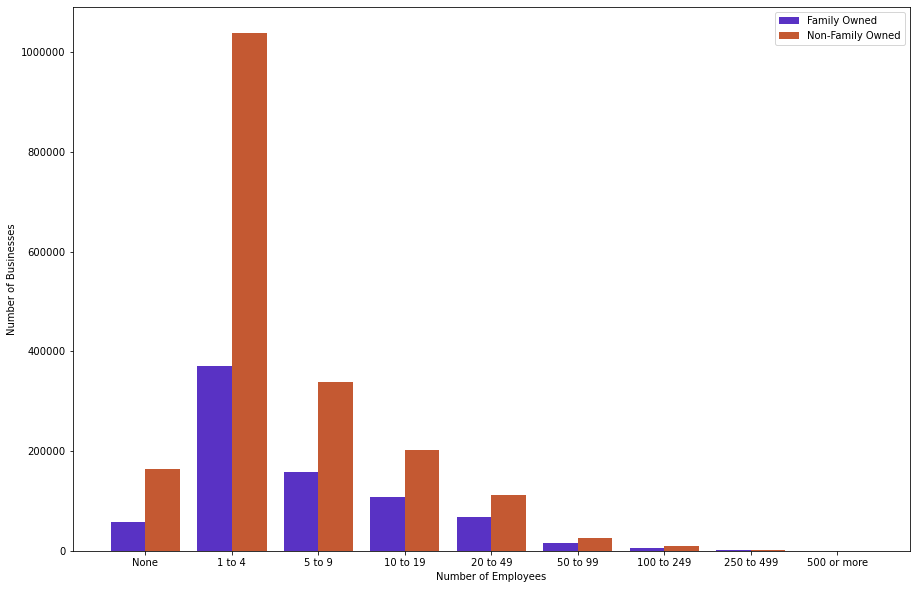

In [53]:
plt.figure(figsize=(15, 10))
plt.ticklabel_format(style='plain')
plt.bar(np.arange(len(family_query)) - 0.2, family_query['FIRMPDEMP'], width=0.4, color='#5932C4', label='Family Owned')
plt.bar(np.arange(len(nonfamily_query)) + 0.2, nonfamily_query['FIRMPDEMP'], width=0.4, color='#C45932', label='Non-Family Owned')
simple_labels= ['None', '1 to 4', '5 to 9', '10 to 19', '20 to 49', '50 to 99', '100 to 249', '250 to 499', '500 or more']
plt.xticks(range(len(family_query)), simple_labels)
# plt.title('Family vs Non Family Owned Businesses By Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Number of Businesses')
plt.legend()

plt.show()